# Step 1: Data Acquisition

In [2]:
import yfinance as yf
import pandas as pd

# Fetch historical data for Tesla (TSLA)
tsla_data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')
tsla_data = tsla_data.reset_index()
print(tsla_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA
0      2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1      2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2      2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3      2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4      2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


# Step 2: Data Preparation

In [5]:
import numpy as np

# Convert dates to numerical values for regression
tsla_data['DateNum'] = np.arange(len(tsla_data))

# Define feature (DateNum) and target (Closing price)
X = tsla_data[['DateNum']]
y = tsla_data['Close']

# Step 3: Splitting the Dataset

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Training the Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 5: Making Predictions

In [14]:
# Generate predictions based on test data
y_pred = model.predict(X_test)

# Step 6: Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 9515.225766961757
R-squared (R²) Score: -0.9413369733613708


# Step 7: Visualization of Results

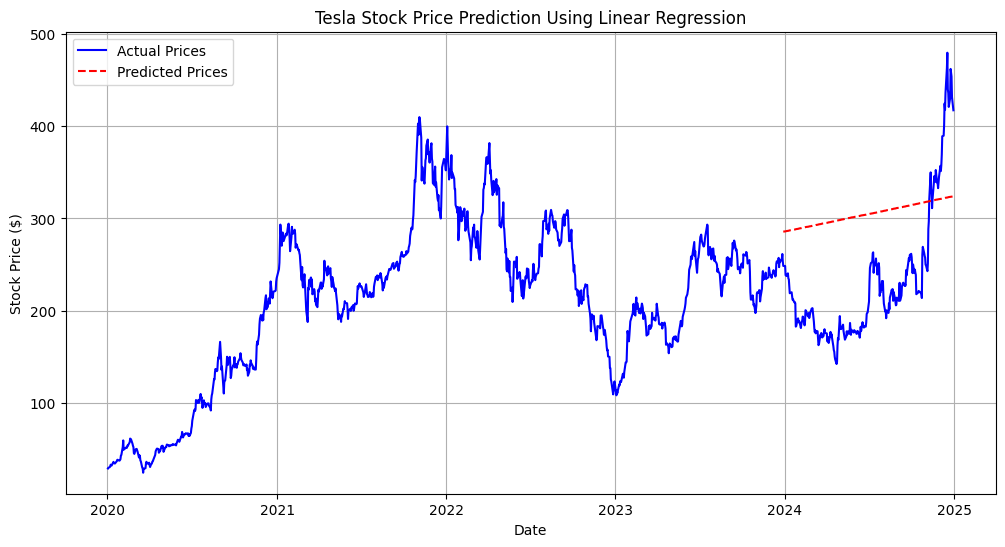

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(tsla_data['Date'], y, label='Actual Prices', color='blue')
plt.plot(tsla_data['Date'].iloc[-len(y_test):], y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.title('Tesla Stock Price Prediction Using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()